In [1]:
import numpy as np
import pandas as pd
import numpy.random as nr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')
from sklearn.cluster import KMeans
import seaborn as sns

from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130710_timesequence_fin_exist', 'r') as f1: 
  f1=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130710_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130711_timesequence_fin_exist', 'r') as f2: 
  f2=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130711_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130712_timesequence_fin_exist', 'r') as f3: 
  f3=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130712_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130713_timesequence_fin_exist', 'r') as f4: 
  f4=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130713_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130714_timesequence_fin_exist', 'r') as f5: 
  f5=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130714_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130715_timesequence_fin_exist', 'r') as f6: 
  f6=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130715_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130716_timesequence_fin_exist', 'r') as f7: 
  f7=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130716_timesequence_fin_exist', 'r')

flist=[f1,f2,f3,f4,f5,f6,f7]
deptime = []  # 8(9) 출발시간
deploc = {} # 9(10) 출발장소
deploc2= [] # 출발장소 리스트형

arrtime = []  # 10(11) 도착시간
arrloc = {} #11(12) 도착장소
arrloc2=[] # 도착장소 리스트형

mostplace={}
spendtime={}
spendtime2={}
avestdtime={}
mostinfo={}

함수
-----------------------

In [3]:
#함수

def caltime(x):
  ye=x//10**10
  mo=(x//10**8)%100
  da=(x//10**6)%100
  ho=(x%10**6)//10**4
  mi=(x%10**4)//100
  se=(x%100)
  scalemin=ho * 60 + mi
  scalesec=ho * 3600 + mi * 60 + se
  return [ye,mo,da,ho,mi,se,scalesec,scalemin]

def caltimeback(x):
  bho = x // 3600
  bmi = x % 3600 // 60
  bse = x % 60
  return [bho,bmi,bse]

Main Part
---------------

In [4]:
statime={}
mintime={}
mintime_dest={}
realtake=12
statlistx=[] ; statlisty=[]
destlistx=[] ; destlisty=[]
for j in range(1): #len(flist)
  tryf=flist[j]
  while True:    # 파일의 줄을 읽어서 한 줄을 하나의 문자열로 저장함(리스트형식으로)
    line=tryf.readline()
    if not line: 
      print('끝')
      break
    line=line.split(',')
    #n=list(filter(None,n))

    #시간계산
    nstat=int(line[8]) #[ye,mo,da,ho,mi,se,scalesec]
    ndest=int(line[10])
    nstat=caltime(nstat)
    ndest=caltime(ndest) 
    
    taketime=ndest[7]-nstat[7] # 걸린시간 
    if taketime>0 and line[9]=='0216' and line[11]=='0222':
    #if taketime>0 and line[11]=='0234':# and line[7]=='06':   #이대역 0241, 을지로입구 0202 , 420초 : 신도림 0234 구로 0232 240초
      str1=nstat[7] #출발역+도착역으로 key값 저장
      str2=ndest[7]
      taketime -= realtake
      #print("원시간",line[8], "바꾼시간",nstat)
      try:
        spendtime[str1].append(taketime) # value를 리스트로 지정하면 거기에 리스트함수 적용가능
      except:
        spendtime[str1] = [taketime]
      statlistx.append(nstat[7])
      statlisty.append(taketime)
      destlistx.append(ndest[7])
      destlisty.append(taketime)

      try:
        spendtime2[str2].append(taketime)
      except:
        spendtime2[str2] = [taketime]
          # 도착, 출발
      try:
        mostplace[str1] += 1
      except:
        mostplace[str1] = 1
      ttime= nstat[7]
      try:
        mintime[ttime] += 1
      except:
        mintime[ttime]  = 1
      ttime= ndest[7]
      try:
        mintime_dest[ttime] += 1
      except:
        mintime_dest[ttime]  = 1

끝


In [5]:
avekey=list(spendtime.keys())
for i in range(0, len(list(spendtime.keys()))):
  str1=avekey[i]
  aven=np.mean(spendtime[str1])
  stdn=np.std(spendtime[str1])
  manytimes=mostplace[str1]
  mostinfo[str1] = [manytimes,aven,stdn]
t=[]
#dic를 items()를 활용해서 튜플로 바꿔준 다음에 정렬하기.
#print("가장많이 이용한 구간 랭킹=",sorted(mostplace.items(), key= lambda x: x[1], reverse= True))
ranking1=sorted(mostinfo.items(), key= lambda x: x[1], reverse= True)

In [6]:
mostinfo2={}
avekey2=list(spendtime2.keys())
for i in range(0, len(list(spendtime2.keys()))):
  str2=avekey2[i]
  aven2=np.mean(spendtime2[str2])
  stdn2=np.std(spendtime2[str2])
  manytimes2=mostplace[str1]
  mostinfo2[str1] = [manytimes2,aven2,stdn2]
t=[]
#dic를 items()를 활용해서 튜플로 바꿔준 다음에 정렬하기.
#print("가장많이 이용한 구간 랭킹=",sorted(mostplace.items(), key= lambda x: x[1], reverse= True))
ranking2=sorted(mostinfo2.items(), key= lambda x: x[1], reverse= True)

In [7]:
for i in range(10):
  print(i+1,'순위:',"구간",ranking1[i])
print("구간별 평균시간과 표준편차 랭킹")
for i in range(3):
  str0=ranking1[i][0]
  print(spendtime[str0])

1 순위: 구간 (516, [48, 3.7916666666666665, 0.6441510347391795])
2 순위: 구간 (508, [46, 5.021739130434782, 0.9665971337137265])
3 순위: 구간 (505, [39, 6.666666666666667, 1.1620788916538112])
4 순위: 구간 (515, [39, 3.128205128205128, 1.5388888295511445])
5 순위: 구간 (456, [38, 2.3684210526315788, 1.8125447744971122])
6 순위: 구간 (459, [34, 2.8823529411764706, 0.32218973970892123])
7 순위: 구간 (452, [34, 1.9705882352941178, 0.9230796956750128])
8 순위: 구간 (507, [33, 5.121212121212121, 1.4303543904492058])
9 순위: 구간 (491, [32, 5.5625, 0.6584783595532961])
10 순위: 구간 (501, [32, 4.0625, 1.7666617531378213])
구간별 평균시간과 표준편차 랭킹
[4, 4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 7, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4]
[5, 5, 5, 5, 6, 6, 7, 5, 5, 5, 5, 5, 4, 7, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 4, 7, 5, 3, 5, 5, 5, 3, 7, 5, 7, 5, 6, 6, 4, 3, 5, 5, 5, 4]
[9, 6, 6, 6, 8, 7, 5, 8, 6, 8, 6, 6, 8, 6, 6, 8, 7, 8, 6, 8, 6, 8, 6, 6, 9, 6, 6, 6, 6, 6, 8, 7, 6, 9, 6, 5, 6, 5,

그래프 그리기
--------------

In [8]:
plt.figure(figsize=(40,10))
keylist2=list(mintime.keys())
print(mintime)
rank_num=sorted(mintime.items(), key= lambda x: x[1], reverse= True)
mintime2=sorted(mintime.items(), key= lambda x: x[0], reverse= False)
ylist=[]
'''
for i in range(len(mintime2)):
  index=mintime2[i]
  ylist.append(mintime2[index])
plt.scatter(keylist2, ylist,c='g',s=1)
'''
xlist3=[]
ylist3=[]
for i in range(len(mintime2)):
  if mintime2[i][0]>180:
    xlist3.append(mintime2[i][0])
    ylist3.append(mintime2[i][1])

print(rank_num)
print(mintime2)

keylist2_dest=list(mintime_dest.keys())
print(mintime_dest)
rank_num_dest=sorted(mintime_dest.items(), key= lambda x: x[1], reverse= True)
mintime2_dest=sorted(mintime_dest.items(), key= lambda x: x[0], reverse= False)
'''
for i in range(len(mintime2)):
  index=mintime2[i]
  ylist.append(mintime2[index])
plt.scatter(keylist2, ylist,c='g',s=1)
'''
xlist4=[]
ylist4=[]
for i in range(len(mintime2_dest)):
  if mintime2_dest[i][0]>180:
    xlist4.append(mintime2_dest[i][0])
    ylist4.append(mintime2_dest[i][1])

print(rank_num_dest)
print(mintime2_dest)

{592: 12, 773: 9, 1074: 6, 502: 24, 492: 12, 1116: 13, 568: 29, 650: 10, 951: 8, 491: 32, 1267: 6, 483: 22, 1109: 10, 521: 16, 988: 6, 1402: 1, 870: 12, 497: 20, 1068: 13, 1082: 12, 954: 3, 797: 4, 490: 26, 657: 9, 890: 9, 665: 7, 807: 15, 418: 8, 557: 22, 458: 14, 1136: 14, 838: 12, 814: 15, 443: 24, 452: 34, 1006: 6, 1247: 6, 587: 5, 523: 20, 519: 31, 869: 11, 960: 7, 551: 18, 1198: 6, 562: 8, 896: 5, 646: 5, 633: 8, 1252: 9, 1183: 11, 611: 6, 1246: 2, 1220: 6, 952: 9, 1098: 17, 687: 12, 813: 16, 1015: 5, 495: 30, 694: 14, 729: 8, 433: 14, 512: 27, 1282: 3, 641: 9, 476: 14, 1130: 8, 508: 46, 1053: 16, 789: 7, 465: 9, 686: 5, 1035: 7, 1049: 12, 1086: 10, 540: 29, 531: 11, 1051: 19, 415: 10, 464: 18, 510: 16, 1395: 1, 456: 38, 1298: 3, 506: 21, 574: 14, 533: 20, 1094: 8, 524: 13, 880: 6, 550: 28, 969: 3, 1121: 15, 898: 4, 597: 7, 1233: 5, 1129: 18, 1274: 2, 542: 13, 593: 16, 1026: 4, 604: 11, 1085: 12, 1128: 10, 1054: 9, 1143: 21, 517: 15, 515: 39, 516: 48, 1310: 2, 509: 26, 820: 12, 1

<Figure size 2880x720 with 0 Axes>

In [9]:
print(xlist4,ylist4)

[354, 363, 364, 370, 374, 375, 381, 382, 385, 386, 391, 392, 393, 395, 396, 398, 399, 404, 405, 411, 412, 414, 415, 417, 418, 426, 427, 428, 429, 431, 435, 436, 438, 440, 441, 443, 444, 446, 447, 448, 449, 451, 452, 453, 454, 457, 458, 459, 460, 462, 463, 464, 465, 466, 467, 468, 469, 470, 473, 474, 475, 478, 479, 480, 481, 484, 485, 486, 487, 490, 491, 495, 496, 498, 499, 502, 503, 504, 505, 508, 509, 510, 511, 513, 514, 516, 517, 522, 523, 524, 525, 526, 527, 528, 529, 531, 532, 535, 536, 537, 538, 539, 541, 542, 545, 546, 548, 549, 550, 551, 552, 554, 555, 556, 557, 562, 563, 564, 568, 569, 570, 571, 572, 576, 577, 578, 580, 583, 584, 585, 586, 587, 589, 590, 591, 592, 593, 595, 596, 598, 599, 600, 601, 602, 604, 605, 608, 610, 611, 612, 615, 616, 620, 621, 622, 626, 627, 628, 629, 632, 633, 634, 636, 637, 640, 641, 642, 643, 647, 648, 652, 653, 654, 655, 657, 658, 659, 660, 664, 665, 666, 667, 668, 672, 673, 674, 677, 678, 679, 684, 685, 686, 690, 691, 695, 698, 699, 700, 704, 705,

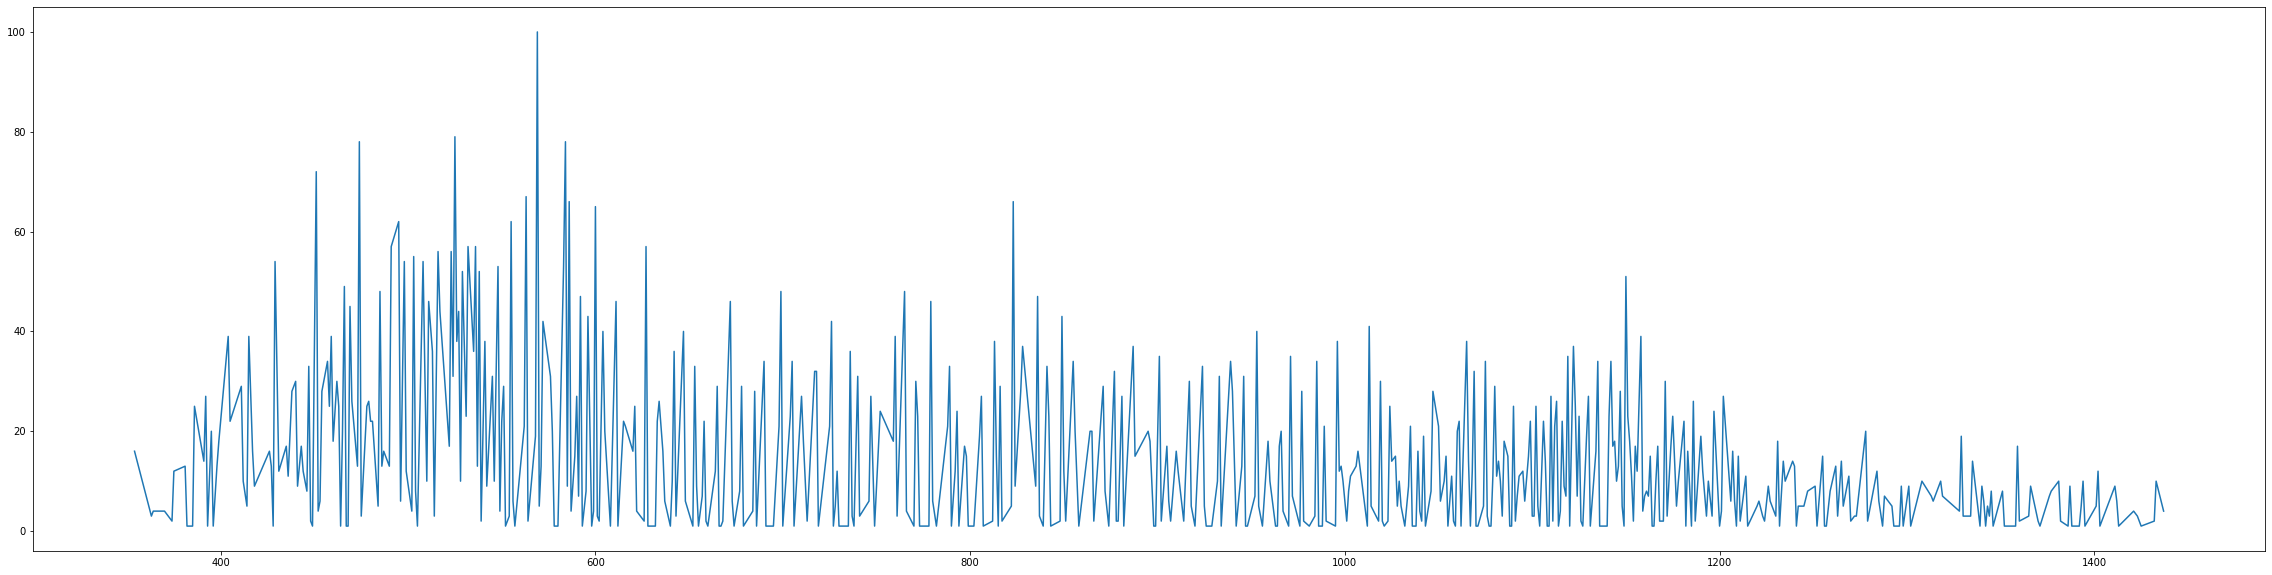

In [10]:
plt.figure(figsize=(40,10))
plt.plot(xlist4,ylist4)

기울기1: -2.5384615384615383
기울기2: 2.8764044943820224
기울기1: 1.0053191489361701
기울기2: 1.0128205128205128


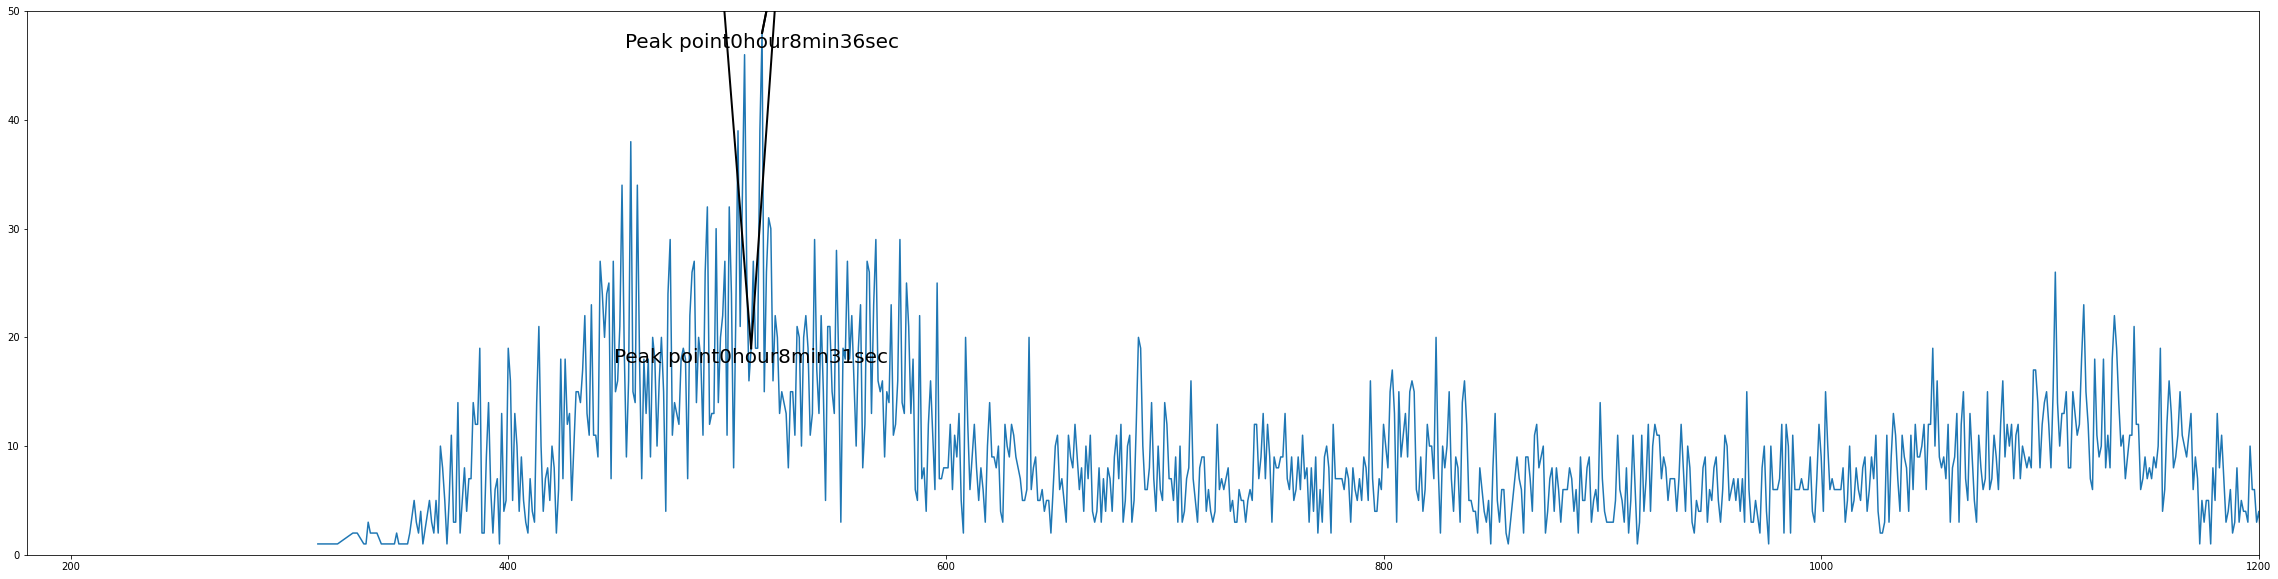

In [11]:
plt.figure(figsize=(40,10))
plt.xlim([180, 1200]) 
plt.ylim([0, 50])
plt.plot(xlist3,ylist3)
#peak
#plt.hlines(rank_num[0][1], 15000, rank_num[0][0], colors='g', linewidth=1)
#plt.vlines(rank_num[0][0], 0, rank_num[0][1], colors='g', linewidth=1)
p1i=76
ppint1= caltimeback(rank_num[p1i][0])
plt.text(rank_num[p1i][0],rank_num[p1i][1],
         'Peak point' + str(ppint1[0]) + 'hour' + str(ppint1[1]) + 'min' + str(ppint1[2]) +'sec' ,
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
#plt.hlines(rank_num[2][1], 15000, rank_num[2][0], colors='g', linewidth=1)
#plt.vlines(rank_num[2][0], 0, rank_num[2][1], colors='g', linewidth=1)
p2i=0
ppint2= caltimeback(rank_num[p2i][0])
plt.text(rank_num[p2i][0],rank_num[p2i][1],
         'Peak point' + str(ppint2[0]) + 'hour' + str(ppint2[1]) + 'min' + str(ppint2[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
'''
ppint3= caltimeback(rank_num[142][0])
plt.text(rank_num[142][0],rank_num[142][1],
         'Peak point' + str(ppint3[0]) + 'hour' + str(ppint3[1]) + 'min' + str(ppint3[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
'''
#기울기 변화
fdx1 = 420 ; fdy1 = 250
fdx2 = rank_num[p1i][0] ; fdy2 = rank_num[p1i][1]
fdx3 = 600 ; fdy3 = 275
print('기울기1:', (fdy2-fdy1) / (fdx2-fdx1) )
print('기울기2:', (fdy3-fdy2) / (fdx3-fdx2))
plt.plot([fdx1,fdx2],[fdy1,fdy2], c= 'k' , linewidth=2)
plt.plot([fdx2,fdx3],[fdy2,fdy3], c= 'k' , linewidth=2)

fdx12 = 1080 ; fdy12 = 615
fdx22 = rank_num[p2i][0] ; fdy22 = rank_num[p2i][1]
fdx32 = 1140 ; fdy32 = 680
print('기울기1:', (fdy22-fdy12) / (fdx22-fdx12) )
print('기울기2:', (fdy32-fdy22) / (fdx32-fdx22))
plt.plot([fdx12,fdx22],[fdy12,fdy22], c= 'k' , linewidth=2)
plt.plot([fdx22,fdx32],[fdy22,fdy32], c= 'k' , linewidth=2)


plt.axvline(25200, color='r', linestyle='--', linewidth=3, label='7시')
plt.axvline(28800, color='r', linestyle='--', linewidth=3, label='8시')
plt.axvline(32400, color='r', linestyle='--', linewidth=3, label='9시')
plt.axvline(36000, color='r', linestyle='--', linewidth=3, label='10시')
plt.axvline(43200, color='r', linestyle='--', linewidth=3, label='12시')
plt.axvline(61200, color='r', linestyle='--', linewidth=3, label='17시')
plt.axvline(64800, color='r', linestyle='--', linewidth=3, label='18시')
plt.axvline(68400, color='r', linestyle='--', linewidth=3, label='19시')
plt.axvline(79200, color='r', linestyle='--', linewidth=3, label='22시')
plt.axvline(82800, color='r', linestyle='--', linewidth=3, label='23시')

In [12]:
print(spendtime)
print(spendtime2)

{592: [7, 6, 6, 7, 6, 7, 7, 7, 6, 6, 7, 7], 773: [4, 3, 4, 4, 4, 4, 4, 3, 3], 1074: [4, 4, 2, 4, 4, 1], 502: [9, 9, 3, 10, 2, 2, 9, 3, 10, 10, 3, 2, 12, 2, 2, 10, 2, 9, 3, 2, 2, 3, 2, 10], 492: [4, 7, 4, 7, 7, 5, 4, 5, 7, 7, 7, 7], 1116: [7, 7, 6, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7], 568: [4, 6, 6, 6, 4, 4, 3, 4, 6, 4, 6, 6, 3, 3, 3, 4, 5, 6, 4, 6, 4, 18, 4, 6, 4, 3, 6, 3, 6], 650: [2, 3, 3, 2, 3, 3, 3, 2, 2, 3], 951: [3, 4, 2, 2, 2, 2, 3, 2], 491: [6, 5, 8, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6], 1267: [6, 5, 5, 5, 6, 5], 483: [3, 3, 3, 13, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3], 1109: [1, 1, 4, 3, 1, 4, 4, 1, 1, 1], 521: [4, 2, 5, 5, 5, 4, 3, 6, 5, 5, 5, 3, 5, 2, 2, 3], 988: [7, 2, 3, 2, 3, 2], 1402: [7], 870: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 497: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5], 1068: [2, 2, 5, 5, 3, 3, 2, 2, 2, 3, 2, 3, 4], 1082: [5, 5, 6, 5, 5, 4, 5, 5, 5, 6, 6, 4], 954: [6, 6, 5], 797: [4,

In [13]:
indicate=0
num=len(spendtime)
keylist=list(spendtime.keys())

'''
for i in range(num):
  if sum(spendtime[keylist[i]])>4000:
    print(i)
    #spendtime[i]=ranking1[rank][1][1]
    print(spendtime[keylist[i]])
'''
xlist=[]
ylist=[]
ra = 180
rb = 1300
print(rb - ra, 12)
for i in range(num):
  x=int(keylist[i])
  y=spendtime[keylist[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra and  x< rb):
    xlist.append(x)
    ylist.append(y)
#plt.errorbar(ranking1[0][1][1], [0,9] , yerr=0 , c='r', capsize=30) # 실제 평균값에서 에러바

keylist2=list(spendtime2.keys())
num2=len(spendtime2)
xlist2=[]
ylist2=[]
ra2 = 180
rb2 = 1300
print(rb2 - ra2, 12)
for i in range(num2):
  x2=int(keylist2[i])
  y2=spendtime2[keylist2[i]]
  y2=np.mean(y2)
  if (y2 < 4500 and  x2 >ra2 and  x2< rb2):
    xlist2.append(x2)
    ylist2.append(y2)

1120 12
1120 12


In [14]:
print(xlist)
print(ylist)

[592, 773, 1074, 502, 492, 1116, 568, 650, 951, 491, 1267, 483, 1109, 521, 988, 870, 497, 1068, 1082, 954, 797, 490, 657, 890, 665, 807, 418, 557, 458, 1136, 838, 814, 443, 452, 1006, 1247, 587, 523, 519, 869, 960, 551, 1198, 562, 896, 646, 633, 1252, 1183, 611, 1246, 1220, 952, 1098, 687, 813, 1015, 495, 694, 729, 433, 512, 1282, 641, 476, 1130, 508, 1053, 789, 465, 686, 1035, 1049, 1086, 540, 531, 1051, 415, 464, 510, 456, 1298, 506, 574, 533, 1094, 524, 880, 550, 969, 1121, 898, 597, 1233, 1129, 1274, 542, 593, 1026, 604, 1085, 1128, 1054, 1143, 517, 515, 516, 509, 820, 1069, 448, 474, 445, 462, 1154, 727, 720, 956, 1115, 735, 1061, 933, 1080, 685, 765, 475, 437, 578, 873, 854, 1171, 934, 1104, 712, 1091, 700, 833, 558, 928, 1140, 1014, 1056, 619, 1142, 656, 964, 489, 1036, 487, 397, 413, 1125, 449, 973, 1097, 379, 764, 404, 480, 520, 1216, 544, 442, 640, 1189, 1213, 946, 899, 394, 606, 1041, 726, 1126, 344, 883, 855, 753, 924, 1065, 1016, 584, 585, 1095, 638, 629, 1077, 563, 470, 4

946 946


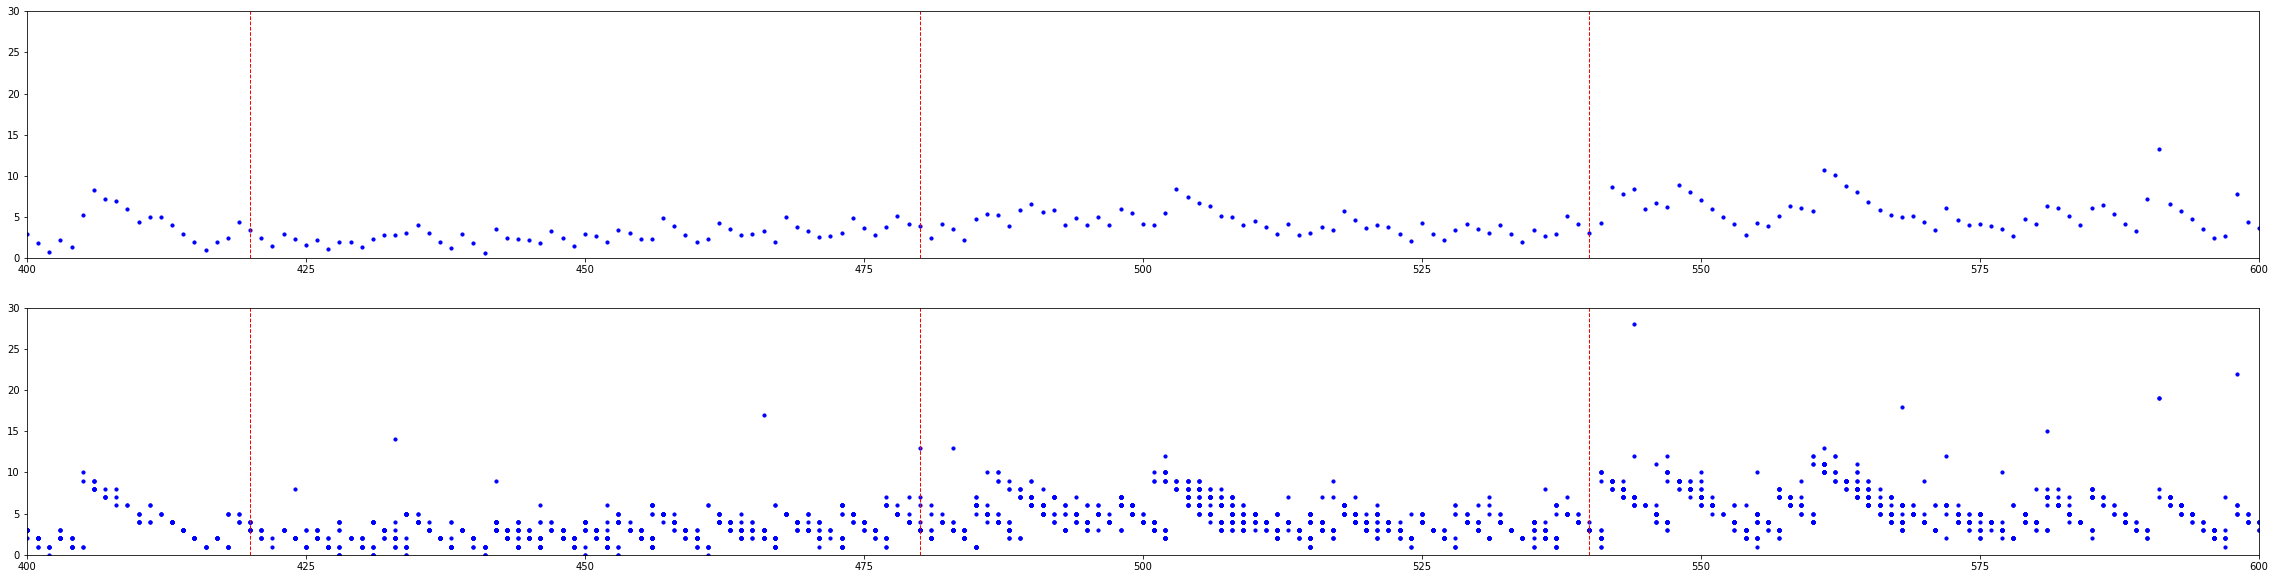

In [15]:
plt.figure(figsize=(40,10))
plt.subplot(211)
plt.xlim([400,600])
plt.ylim([0,30])
plt.axvline(420, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(480, color='r', linestyle='--', linewidth=1, label='8시')
plt.axvline(540, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(600, color='r', linestyle='--', linewidth=1, label='10시')
plt.axvline(720, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(1020, color='r', linestyle='--', linewidth=1, label='17시')
plt.axvline(1080, color='r', linestyle='--', linewidth=1, label='18시')
plt.axvline(1140, color='r', linestyle='--', linewidth=1, label='19시')
plt.axvline(1320, color='r', linestyle='--', linewidth=1, label='22시')
plt.axvline(1380, color='r', linestyle='--', linewidth=1, label='23시')
#plt.axhline(realtake, color='r', linestyle='--', linewidth=1, label='걸린시간')
print(len(xlist), len(ylist))
plt.scatter(xlist,ylist,c='b',s=10)

plt.subplot(212)
plt.xlim([400,600])
plt.ylim([0,30])
plt.axvline(420, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(480, color='r', linestyle='--', linewidth=1, label='8시')
plt.axvline(540, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(600, color='r', linestyle='--', linewidth=1, label='10시')
plt.axvline(720, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(1020, color='r', linestyle='--', linewidth=1, label='17시')
plt.axvline(1080, color='r', linestyle='--', linewidth=1, label='18시')
plt.axvline(1140, color='r', linestyle='--', linewidth=1, label='19시')
plt.axvline(1320, color='r', linestyle='--', linewidth=1, label='22시')
plt.axvline(1380, color='r', linestyle='--', linewidth=1, label='23시')
plt.scatter(statlistx,statlisty,c='b',s=10)
#plt.scatter(xlist2,ylist2,c='g',s=10)


946 946


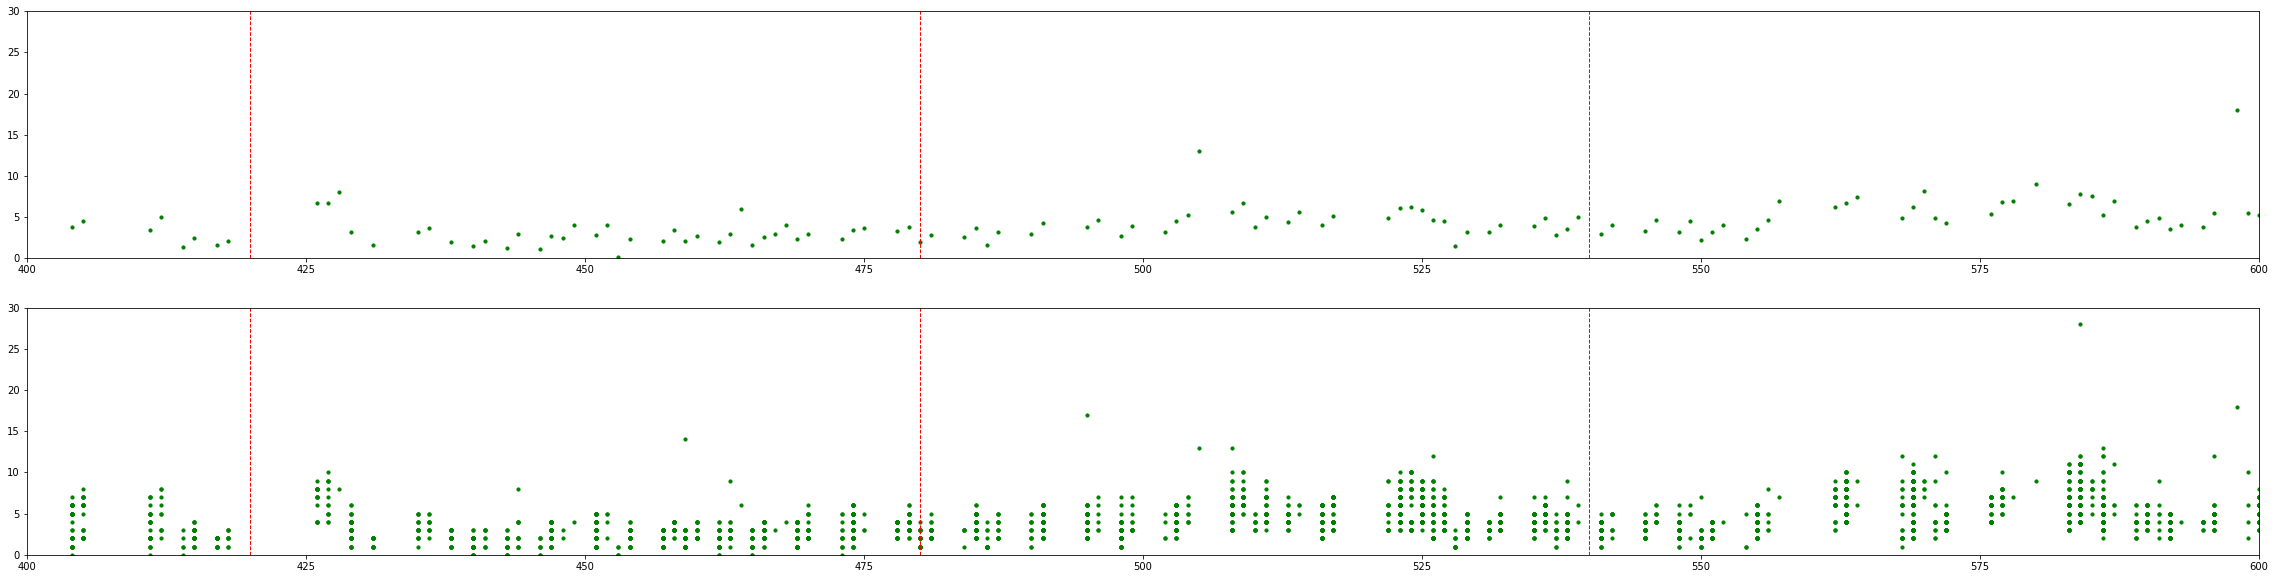

In [16]:
plt.figure(figsize=(40,10))
plt.subplot(211)
plt.xlim([400,600])
plt.ylim([0,30])
plt.axvline(420, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(480, color='r', linestyle='--', linewidth=1, label='8시')
plt.axvline(540, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(600, color='r', linestyle='--', linewidth=1, label='10시')
plt.axvline(720, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(1020, color='r', linestyle='--', linewidth=1, label='17시')
plt.axvline(1080, color='r', linestyle='--', linewidth=1, label='18시')
plt.axvline(1140, color='r', linestyle='--', linewidth=1, label='19시')
plt.axvline(1320, color='r', linestyle='--', linewidth=1, label='22시')
plt.axvline(1380, color='r', linestyle='--', linewidth=1, label='23시')
#plt.axhline(realtake, color='r', linestyle='--', linewidth=1, label='걸린시간')
print(len(xlist), len(ylist))
plt.scatter(xlist2,ylist2,c='g',s=10)

plt.subplot(212)
plt.xlim([400,600])
plt.ylim([0,30])
plt.axvline(420, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(480, color='r', linestyle='--', linewidth=1, label='8시')
plt.axvline(540, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(600, color='r', linestyle='--', linewidth=1, label='10시')
plt.axvline(720, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(1020, color='r', linestyle='--', linewidth=1, label='17시')
plt.axvline(1080, color='r', linestyle='--', linewidth=1, label='18시')
plt.axvline(1140, color='r', linestyle='--', linewidth=1, label='19시')
plt.axvline(1320, color='r', linestyle='--', linewidth=1, label='22시')
plt.axvline(1380, color='r', linestyle='--', linewidth=1, label='23시')
plt.scatter(destlistx,destlisty,c='g',s=10)

946 946


"\nplt.scatter(xlist,ylist,c='b',s=5)\nplt.scatter(xlist2,ylist2,c='g',s=5)\n"

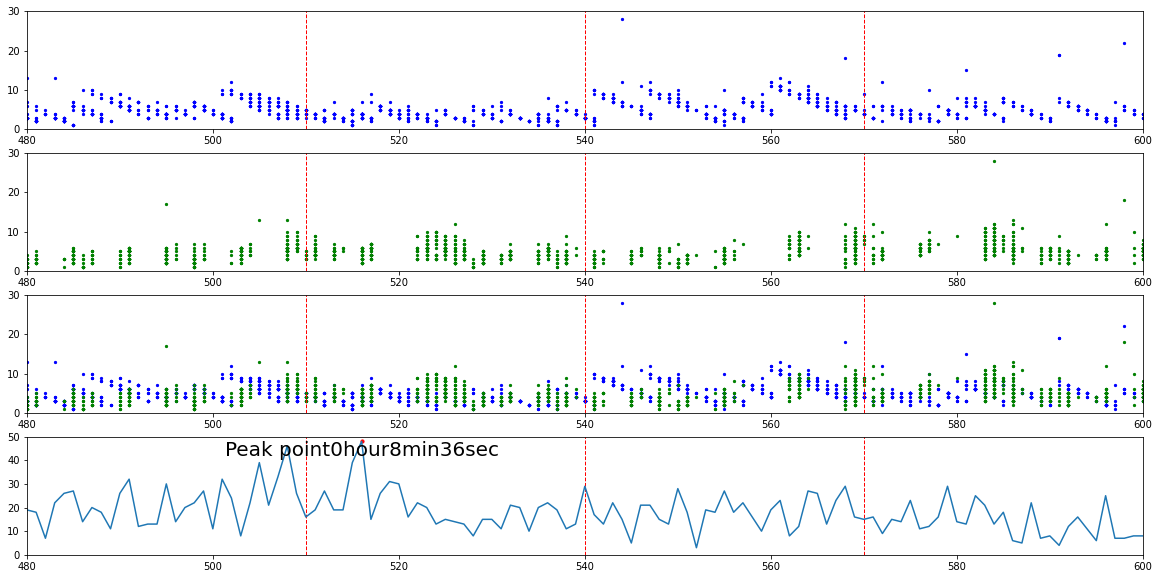

In [17]:
plt.figure(figsize=(20,10))
#plt.axhline(realtake, color='r', linestyle='--', linewidth=1, label='걸린시간')
print(len(xlist), len(ylist))

plt.subplot(311)
xsize1 = 480 ; xsize2 = 600
ysize1 = 0 ; ysize2 = 30

plt.subplot(411)
plt.xlim([xsize1,xsize2])
plt.ylim([ysize1,ysize2])
plt.axvline(510, color='r', linestyle='--', linewidth=1, label='8시30분')
plt.axvline(540, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(570, color='r', linestyle='--', linewidth=1, label='9시30분')
plt.scatter(statlistx,statlisty,c='b',s=5)

plt.subplot(412)
plt.xlim([xsize1,xsize2])
plt.ylim([ysize1,ysize2])
plt.axvline(510, color='r', linestyle='--', linewidth=1, label='8시30분')
plt.axvline(540, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(570, color='r', linestyle='--', linewidth=1, label='9시30분')
plt.scatter(destlistx,destlisty,c='g',s=5)

plt.subplot(413)
plt.xlim([xsize1,xsize2])
plt.ylim([ysize1,ysize2])
plt.axvline(510, color='r', linestyle='--', linewidth=1, label='8시30분')
plt.axvline(540, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(570, color='r', linestyle='--', linewidth=1, label='9시30분')
plt.scatter(statlistx,statlisty,c='b',s=5)
plt.scatter(destlistx,destlisty,c='g',s=5)

plt.subplot(414)
plt.axvline(510, color='r', linestyle='--', linewidth=1, label='8시30분')
plt.axvline(540, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(570, color='r', linestyle='--', linewidth=1, label='9시30분')
plt.xlim([xsize1,xsize2])
plt.ylim([ysize1,50])
plt.plot(xlist3,ylist3)
p2i=0
ppint2= caltimeback(rank_num[p2i][0])
plt.scatter(rank_num[p2i][0],rank_num[p2i][1], c='r', s=10)
plt.text(rank_num[p2i][0],rank_num[p2i][1],
         'Peak point' + str(ppint2[0]) + 'hour' + str(ppint2[1]) + 'min' + str(ppint2[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
'''
plt.scatter(xlist,ylist,c='b',s=5)
plt.scatter(xlist2,ylist2,c='g',s=5)
'''

In [18]:
print(spendtime)
print(len(spendtime))
print(len(spendtime2))

{592: [7, 6, 6, 7, 6, 7, 7, 7, 6, 6, 7, 7], 773: [4, 3, 4, 4, 4, 4, 4, 3, 3], 1074: [4, 4, 2, 4, 4, 1], 502: [9, 9, 3, 10, 2, 2, 9, 3, 10, 10, 3, 2, 12, 2, 2, 10, 2, 9, 3, 2, 2, 3, 2, 10], 492: [4, 7, 4, 7, 7, 5, 4, 5, 7, 7, 7, 7], 1116: [7, 7, 6, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7], 568: [4, 6, 6, 6, 4, 4, 3, 4, 6, 4, 6, 6, 3, 3, 3, 4, 5, 6, 4, 6, 4, 18, 4, 6, 4, 3, 6, 3, 6], 650: [2, 3, 3, 2, 3, 3, 3, 2, 2, 3], 951: [3, 4, 2, 2, 2, 2, 3, 2], 491: [6, 5, 8, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6], 1267: [6, 5, 5, 5, 6, 5], 483: [3, 3, 3, 13, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3], 1109: [1, 1, 4, 3, 1, 4, 4, 1, 1, 1], 521: [4, 2, 5, 5, 5, 4, 3, 6, 5, 5, 5, 3, 5, 2, 2, 3], 988: [7, 2, 3, 2, 3, 2], 1402: [7], 870: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 497: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5], 1068: [2, 2, 5, 5, 3, 3, 2, 2, 2, 3, 2, 3, 4], 1082: [5, 5, 6, 5, 5, 4, 5, 5, 5, 6, 6, 4], 954: [6, 6, 5], 797: [4,

3600 420
w: nan b: nan w/b nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: ignored

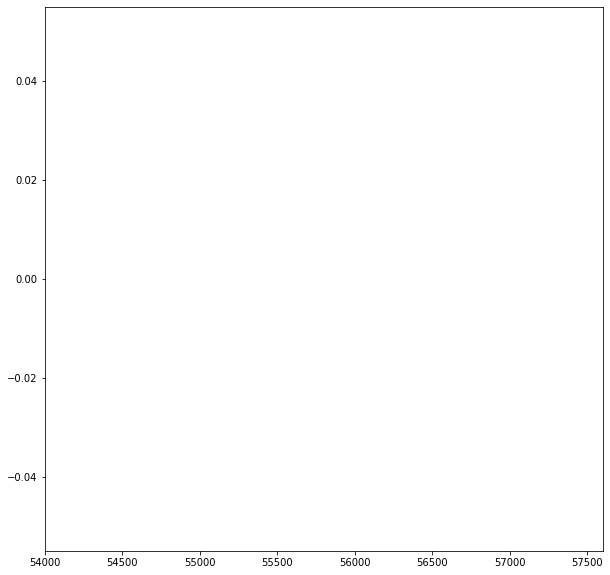

In [19]:
#선형학습
plt.figure(figsize=(10,10))
w=1
b=1

def cost(w,b):
  for i in range(len(xlist)):
    cf = (1/(2*len(xlist))) * (w * xlist[i] + b - ylist[i])**2
  return cf

num=len(spendtime)
keylist=list(spendtime.keys())
xlin=[] ; ylin=[]
ra = 54000 ; rb = 57600
print(rb - ra,420)
for i in range(num):
  x=int(keylist[i])
  y=spendtime[keylist[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra and  x< rb):
    xlin.append(x)
    ylin.append(y)
plt.scatter(xlin,ylin,c='b',s=10)
plt.xlim(ra,rb)
xlin = np.array(xlin)
ylin = np.array(ylin)
x = xlin
xx = xlin * xlin
y= ylin
xy = xlin * ylin

ex = np.mean(x)
exx = np.mean(xx)
ey = np.mean(y)
exy= np.mean(xy)
w = ((ex)**2 -(ex*ey) + (exy) ) / exx
b = -1 * ex * w + ey
print('w:',w,'b:',b, 'w/b',w/b)

xlin = sorted(xlin)
stax = xlin[0] ; finx = xlin[len(xlin)-1]
stay = stax * w + b ; finy = finx * w + b
plt.plot([stax,finx],[finy,stay])
plt.axvline(45000, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(46800, color='r', linestyle='--', linewidth=1, label='13시')
plt.axvline(48600, color='r', linestyle='--', linewidth=1, label='13시')
plt.axvline(55800, color='r', linestyle='--', linewidth=1, label='12시')
plt.xlim([54000,57600])
plt.ylim([0,750])

In [ ]:
#선형학습
plt.figure(figsize=(10,10))
w=1
b=1

def cost(w,b):
  for i in range(len(xlist)):
    cf = (1/(2*len(xlist))) * (w * xlist[i] + b - ylist[i])**2
  return cf

num=len(spendtime2)
keylist2=list(spendtime2.keys())
xlin=[] ; ylin=[]
ra = 43200 ; rb = 46800
print(rb - ra, 720)
for i in range(num):
  x=int(keylist2[i])
  y=spendtime2[keylist2[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra and  x< rb):
    xlin.append(x)
    ylin.append(y)
plt.scatter(xlin,ylin,c='b',s=1 )
plt.xlim(ra,rb)
xlin = np.array(xlin)
ylin = np.array(ylin)
x = xlin
xx = xlin * xlin
y= ylin
xy = xlin * ylin

ex = np.mean(x)
exx = np.mean(xx)
ey = np.mean(y)
exy= np.mean(xy)
w = ((ex)**2 -(ex*ey) + (exy) ) / exx
b = -1 * ex * w + ey
print('w:',w,'b:',b, 'w/b',w/b)

xlin = sorted(xlin)
stax = xlin[0] ; finx = xlin[len(xlin)-1]
stay = stax * w + b ; finy = finx * w + b
plt.plot([stax,finx],[finy,stay])
print(stax, finx)
print(stay, finy)
plt.axvline(45000, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(46800, color='r', linestyle='--', linewidth=1, label='13시')
plt.axvline(48600, color='r', linestyle='--', linewidth=1, label='13시')

In [ ]:
print(spendtime)

In [ ]:
#K means
num=len(spendtime)
k_keylist=list(spendtime.keys())
k_xlist=[]
k_ylist=[]
ra = 31300
rb = 32500
print(rb - ra, 720)
for i in range(num):
  x=int(k_keylist[i])
  y=spendtime[k_keylist[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra and  x< rb):
    k_xlist.append(x)
    k_ylist.append(y)
print(k_xlist)
print(k_ylist)
df = pd.DataFrame(columns=('x','y'))
df['x'] = k_xlist ; df['y'] = k_ylist
data_points = df.values

kmeans = KMeans(n_clusters = 5).fit(data_points)
df['cluster_id'] = kmeans.labels_

In [ ]:
sns.lmplot('x','y', data = df, fit_reg = False, scatter_kws={"s":10})
sns.lmplot('x','y',data=df,fit_reg = False, scatter_kws={"s":10},hue="cluster_id")

In [ ]:
'''
rank=0
index=str(ranking1[rank][0]) #1순위 구간이름 문자열로 변환
times=sorted(times.items(), key= lambda x: x[1], reverse= True)
print(times)

insider=0
outsider=0
mean=ranking1[0][1][1]
std=ranking1[0][1][2]
for i in range(len(times)):
  if times[i][0]>=mean+std:
    outsider+=times[i][1]
  else:
    insider+=times[i][1]
print("평균+표준편차보다 더 늦게 온 사람")
print(outsider, insider)
print((outsider/(insider+outsider))*100)

insider=0
outsider=0
for i in range(len(times)):
  if times[i][0]>=mean:
    outsider+=times[i][1]
  else:
    insider+=times[i][1]
print("평균보다 더 늦게 온 사람")
print(outsider, insider)
print((outsider/(insider+outsider))*100)
'''

마무리
------------------

In [ ]:
for i in range(len(flist)):
  tryf=flist[i]
  tryf.close()